In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/CEE316/Project/Data/Berea_2d25um_grayscale.raw'
img3d = np.fromfile(path, dtype=np.uint8)
imageSize = (1000,1000,1000)
img3d = img3d.reshape(imageSize)

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.close()
ax.set_xlabel("X")
ax.set_ylabel("Y")
# list of artist objects / frames
ims = []
step = 0
step_size = 10
while step < imageSize[2]:
    c = ax.imshow(img3d[:,:,step], cmap='gray')
    ims.append((c, ))
    step += step_size
# animate from the frames
anim = animation.ArtistAnimation(fig, ims, \
                                   interval=100, repeat_delay=3000, blit=True)
# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')
anim

Output hidden; open in https://colab.research.google.com to view.

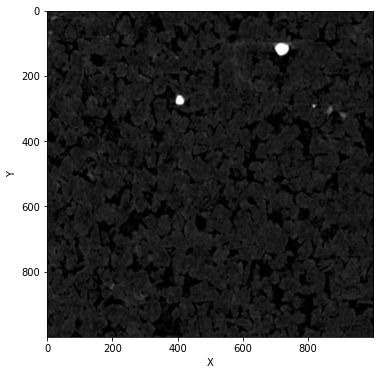

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.imshow(img3d[:,:,0], cmap='gray')

In [ ]:
# import the necessary packages for creating a simple neural network.
import torch
from torch.autograd import Variable
import torch.nn.functional as F

[sizing for hyperparameters](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks)
$$
O = \frac{I - F + P_{\text{start}} + P_{\text{end}}}{S} + 1
$$

In [ ]:
class SimpleCNN(torch.nn.Module):
  def __init__(self):
    super(SimpleCNN, self).__init__()
    #Input channels = 1 (gray-scale), output channels = 18
    self.conv1 = torch.nn.Conv2d(1, 18, kernel_size = 3, stride = 1, padding = 1)
    self.pool = torch.nn.MaxPool2d(kernel_size = 2, stride = 2, padding = 0)
    #4608 input features, 64 output features (see sizing flow below)
    self.fc1 = torch.nn.Linear(18 * 16 * 16, 64)
    #64 input features, 10 output features for our 10 defined classes
    self.fc2 = torch.nn.Linear(64, 10)

  def forward(self, x):
   x = F.relu(self.conv1(x))
   x = self.pool(x)
   x = x.view(-1, 18 * 16 *16)
   x = F.relu(self.fc1(x))
   #Computes the second fully connected layer (activation applied later)
   #Size changes from (1, 64) to (1, 10)
   x = self.fc2(x)
   return(x)